In [1]:
import pandas as pd
import numpy as np
import smtplib
from matplotlib import style
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sp = pd.read_csv('xAPI-Edu-Data.csv')
sp.head(3)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L


In [3]:
cvtnum_sp = sp

gender_map = {'M':1, 
              'F':2}

NationalITy_map = {  'Iran': 1,
                     'SaudiArabia': 2,
                     'USA': 3,
                     'Egypt': 4,
                     'Lybia': 5,
                     'lebanon': 6,
                     'Morocco': 7,
                     'Jordan': 8,
                     'Palestine': 9,
                     'Syria': 10,
                     'Tunis': 11,
                     'KW': 12,
                     'KuwaIT': 12,
                     'Iraq': 13,
                     'venzuela': 14}
PlaceofBirth_map =  {'Iran': 1,
                     'SaudiArabia': 2,
                     'USA': 3,
                     'Egypt': 4,
                     'Lybia': 5,
                     'lebanon': 6,
                     'Morocco': 7,
                     'Jordan': 8,
                     'Palestine': 9,
                     'Syria': 10,
                     'Tunis': 11,
                     'KW': 12,
                     'KuwaIT': 12,
                     'Iraq': 13,
                     'venzuela': 14}

StageID_map = {'HighSchool':1, 
               'MiddleSchool':2,
               'lowerlevel':3}

GradeID_map =   {'G-02':2,
                 'G-08':8,
                 'G-09':9,
                 'G-04':4,
                 'G-05':5,
                 'G-06':6,
                 'G-07':7,
                 'G-12':12,
                 'G-11':11,
                 'G-10':10}

SectionID_map = {'A':1,  
                 'B':2,
                 'C':3}

Topic_map  =    {'Biology' : 1,
                 'Geology' : 2,
                 'Quran' : 3,
                 'Science' : 4,
                 'Spanish' : 5,
                 'IT' : 6,
                 'French' : 7,
                 'English' :8,
                 'Arabic' :9,
                 'Chemistry' :10,
                 'Math' :11,
                 'History' : 12}
Semester_map = {'S':1, 
                'F':2}

Relation_map = {'Mum':1, 
                'Father':2} 

ParentAnsweringSurvey_map = {'Yes':1,
                             'No':0}

ParentschoolSatisfaction_map = {'Bad':0,
                                'Good':1}

StudentAbsenceDays_map = {'Under-7':0,
                          'Above-7':1}

Class_map = {'H':10,
             'M':5,
             'L':2}

cvtnum_sp.gender  = cvtnum_sp.gender.map(gender_map)
cvtnum_sp.NationalITy     = cvtnum_sp.NationalITy.map(NationalITy_map)
cvtnum_sp.PlaceofBirth     = cvtnum_sp.PlaceofBirth.map(PlaceofBirth_map)
cvtnum_sp.StageID       = cvtnum_sp.StageID.map(StageID_map)
cvtnum_sp.GradeID = cvtnum_sp.GradeID.map(GradeID_map)
cvtnum_sp.SectionID    = cvtnum_sp.SectionID.map(SectionID_map)
cvtnum_sp.Topic     = cvtnum_sp.Topic.map(Topic_map)
cvtnum_sp.Semester   = cvtnum_sp.Semester.map(Semester_map)
cvtnum_sp.Relation   = cvtnum_sp.Relation.map(Relation_map)
cvtnum_sp.ParentAnsweringSurvey   = cvtnum_sp.ParentAnsweringSurvey.map(ParentAnsweringSurvey_map)
cvtnum_sp.ParentschoolSatisfaction   = cvtnum_sp.ParentschoolSatisfaction.map(ParentschoolSatisfaction_map)
cvtnum_sp.StudentAbsenceDays   = cvtnum_sp.StudentAbsenceDays.map(StudentAbsenceDays_map)
cvtnum_sp.Class  = cvtnum_sp.Class.map(Class_map)

In [4]:
cvtnum_sp.corr()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
gender,1.000000,-0.115850,-0.106873,0.017793,-0.018304,-0.054907,-0.004336,0.049156,-0.195142,0.149978,0.210932,0.052139,0.124703,0.022359,0.093478,-0.209011,0.259713
NationalITy,-0.115850,1.000000,0.905239,0.004731,0.007082,0.010240,0.045876,0.150257,0.237680,-0.061462,-0.100490,-0.143961,0.042010,0.017254,-0.039137,-0.000887,-0.076871
PlaceofBirth,-0.106873,0.905239,1.000000,0.038040,-0.026669,0.035751,0.075617,0.141741,0.242518,-0.100488,-0.116153,-0.166138,0.020353,0.043879,-0.015922,0.029063,-0.081499
StageID,0.017793,0.004731,0.038040,1.000000,-0.951452,0.296416,0.101451,0.029512,-0.034205,-0.172751,-0.068621,-0.163666,-0.161406,-0.114025,0.014272,0.112536,-0.073349
GradeID,-0.018304,0.007082,-0.026669,-0.951452,1.000000,-0.329056,-0.091057,-0.076370,0.034626,0.194382,0.078741,0.198552,0.180966,0.116915,-0.018349,-0.084896,0.061269
SectionID,-0.054907,0.010240,0.035751,0.296416,-0.329056,1.000000,-0.142515,-0.046763,-0.005783,-0.143862,-0.080909,-0.144955,-0.102538,-0.018449,-0.070405,-0.037062,-0.036378
Topic,-0.004336,0.045876,0.075617,0.101451,-0.091057,-0.142515,1.000000,0.010069,0.014026,-0.146281,-0.142789,-0.104989,-0.038416,0.001485,-0.032494,0.087633,-0.062911
Semester,0.049156,0.150257,0.141741,0.029512,-0.076370,-0.046763,0.010069,1.000000,0.148705,-0.178358,-0.173219,-0.287066,-0.019083,-0.023628,0.025258,0.072462,-0.121480
Relation,-0.195142,0.237680,0.242518,-0.034205,0.034626,-0.005783,0.014026,0.148705,1.000000,-0.364237,-0.360240,-0.339505,-0.026720,-0.163811,-0.287698,0.219687,-0.410879
raisedhands,0.149978,-0.061462,-0.100488,-0.172751,0.194382,-0.143862,-0.146281,-0.178358,-0.364237,1.000000,0.691572,0.643918,0.339386,0.316570,0.297015,-0.463882,0.623671


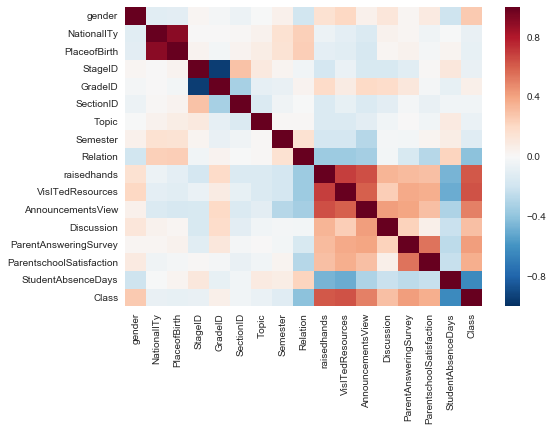

In [6]:
variable_correlations = sp.corr()
#variable correlations heatmap
sns.heatmap(variable_correlations)